In [2]:
import pandas as pd
import pyod
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pyod.models.iforest import IForest
import scikitplot as skplt
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report, recall_score,roc_auc_score

In [ ]:
df = pd.read_csv()  # training

df1 = pd.read_csv()  # testing

In [5]:
# best results regarding anomalies in the values with date, value, constraints  
# and when available: max, min or 'is_below_max' 
features = ['date', 'value', 'is_below_max', 'anomaly']

df_selected = df[features]

df_selected_datetime=df_selected.copy(deep=True)
df_selected_datetime['datetime']=pd.to_datetime(df_selected['date'], unit='s')

df1_selected = df[features]

df1_selected_datetime=df_selected.copy(deep=True)
df1_selected_datetime['datetime']=pd.to_datetime(df_selected['date'], unit='s')

In [6]:
df_selected_datetime['anomaly']=np.where(df_selected_datetime['anomaly']==1,0,df_selected_datetime['anomaly'])
df_selected_datetime['anomaly']=np.where(df_selected_datetime['anomaly']==-1,1,df_selected_datetime['anomaly'])

df1_selected_datetime['anomaly']=np.where(df_selected_datetime['anomaly']==1,0,df_selected_datetime['anomaly'])
df1_selected_datetime['anomaly']=np.where(df_selected_datetime['anomaly']==-1,1,df_selected_datetime['anomaly'])

In [7]:
fraq=(sum(df_selected_datetime['anomaly']))/df_selected_datetime.shape[0]
display(fraq)

fraq=(sum(df1_selected_datetime['anomaly']))/df1_selected_datetime.shape[0]
display(fraq)

0.048426826973108815

In [ ]:
#------------------- Anomaly Detecion -------------------------------------

In [56]:
training_features=['date', 'value', 'is_below_max']
x=int(df_selected_datetime.shape[0]*1.0)
train_data=df_selected_datetime.head(x)
train=train_data[training_features]

y=int(df1_selected_datetime.shape[0]*1.0)
test_data=df1_selected_datetime.head(y)
test=test_data[training_features]
display(train,test)

date   value     max     min
0       1.554446e+09       0      -1      -1
1       1.554446e+09 -911088  400000 -400000
2       1.554446e+09 -911088  400000 -400000
3       1.554446e+09 -911088  400000 -400000
4       1.554446e+09 -911088  400000 -400000
...              ...     ...     ...     ...
252910  1.554683e+09       0      -1      -1
252911  1.554683e+09       0      -1      -1
252912  1.554683e+09       0      -1      -1
252913  1.554683e+09       0      -1      -1
252914  1.554683e+09       0      -1      -1

[252915 rows x 4 columns]

date  value     max     min
252915  1.554683e+09      0      -1      -1
252916  1.554683e+09      0      -1      -1
252917  1.554683e+09      0      -1      -1
252918  1.554683e+09      0      -1      -1
252919  1.554683e+09      0      -1      -1
...              ...    ...     ...     ...
361303  1.556193e+09 -16692  400000 -400000
361304  1.556193e+09 -16692  400000 -400000
361305  1.554783e+09      0      -1      -1
361306  1.554783e+09      0      -1      -1
361307  1.556193e+09 -16692  400000 -400000

[108393 rows x 4 columns]

In [57]:
true_label_train=train_data['anomaly']
true_label_test=test_data['anomaly']


In [58]:
anomalies_train=sum(train_data['anomaly'])
anomalies_test=sum(test_data['anomaly'])
display(anomalies_train,anomalies_test)
fraq=(sum(train_data['anomaly']))/train_data.shape[0]
display(fraq)

10956

6541

0.043318901607259354

In [59]:
# best results regarding anomalies in the values with contamination 0,05, max_features = 1, max_samples = 0.8
model=IForest(contamination=0.05, max_features=1, max_samples=0.8)

In [60]:
model.fit(train)

IForest(behaviour='old', bootstrap=False, contamination=0.05, max_features=1,
    max_samples='auto', n_estimators=50, n_jobs=1, random_state=None,
    verbose=0)

In [ ]:
#--------------- Training -----------------------------

In [61]:
pred_train=model.labels_
train_scores=model.decision_scores_

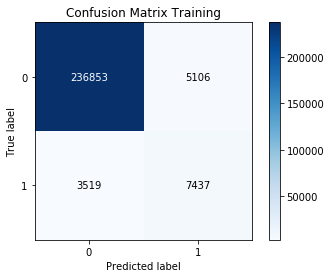

In [62]:
skplt.metrics.plot_confusion_matrix(true_label_train,pred_train, 
                                    normalize=False,
                                    title="Confusion Matrix Training")
#plt.savefig('Conf_matrix_IF_werte_train.png')

In [63]:
acc = accuracy_score(true_label_train,pred_train)
pre = precision_score(true_label_train,pred_train)
f1 = f1_score(true_label_train,pred_train)
recall = recall_score(true_label_train,pred_train)
auc = roc_auc_score(true_label_train,train_scores)
display(acc,pre,f1,recall,auc)
classification_report(true_label_train,pred_train,output_dict=True)

0.9658976335923136

0.5929203539823009

0.6329631048129708

0.6788061336254108

0.9811834198806785

{'0': {'precision': 0.9853601917028606,
  'recall': 0.9788972511871846,
  'f1-score': 0.9821180890301474,
  'support': 241959},
 '1': {'precision': 0.5929203539823009,
  'recall': 0.6788061336254108,
  'f1-score': 0.6329631048129708,
  'support': 10956},
 'accuracy': 0.9658976335923136,
 'macro avg': {'precision': 0.7891402728425807,
  'recall': 0.8288516924062976,
  'f1-score': 0.8075405969215591,
  'support': 252915},
 'weighted avg': {'precision': 0.9683601289858749,
  'recall': 0.9658976335923136,
  'f1-score': 0.9669930786231593,
  'support': 252915}}

In [ ]:
#--------------------- Testing --------------------------------

In [64]:
pred = model.predict(test)
scores = model.decision_function(test)


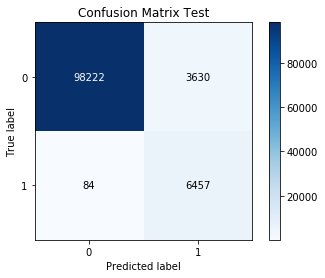

In [65]:
skplt.metrics.plot_confusion_matrix(true_label_test,pred, 
                                    normalize=False,
                                    title="Confusion Matrix Test")
#plt.savefig('Conf_matrix_AE_werte.png')

In [66]:
acc = accuracy_score(true_label_test,pred)
pre = precision_score(true_label_test,pred)
f1 = f1_score(true_label_test,pred)
recall = recall_score(true_label_test,pred)
auc = roc_auc_score(true_label_test,scores)
display(acc,pre,f1,recall,auc)
classification_report(true_label_test,pred,output_dict=True)

0.9657357947468932

0.6401308615049073

0.7766418089968727

0.9871579269224889

0.9656398779724108

{'0': {'precision': 0.9991455251968344,
  'recall': 0.9643600518399246,
  'f1-score': 0.9814446587196116,
  'support': 101852},
 '1': {'precision': 0.6401308615049073,
  'recall': 0.9871579269224889,
  'f1-score': 0.7766418089968727,
  'support': 6541},
 'accuracy': 0.9657357947468932,
 'macro avg': {'precision': 0.8196381933508708,
  'recall': 0.9757589893812068,
  'f1-score': 0.8790432338582421,
  'support': 108393},
 'weighted avg': {'precision': 0.9774807044500251,
  'recall': 0.9657357947468932,
  'f1-score': 0.9690857846222397,
  'support': 108393}}

In [ ]:
#Grid Search

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [74]:
tuned_parameters = [{'n_estimators': [50,100,150], 'contamination': [0.05,0.06],
                     'max_features': [1,3], 'max_samples':[0.6,0.8]}]

In [71]:
scores = ['precision','recall','f1'] 

In [75]:
cv = [(slice(None), slice(None))]

In [76]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        IForest(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(train, true_label_train)

    print("Best parameters set found on:")
    print()
    print(clf.best_params_)
    print()
    print("Best score:")
    print(clf.best_score_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    print("Evaluation:")
    print()
    true_label, pred = true_label_test, clf.predict(test)
    print(classification_report(true_label, pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on:

{'contamination': 0.05, 'max_features': 1, 'max_samples': 0.6, 'n_estimators': 50}

Best score:
0.8068822478760167

Grid scores on development set:

0.807 (+/-0.099) for {'contamination': 0.05, 'max_features': 1, 'max_samples': 0.6, 'n_estimators': 50}
0.804 (+/-0.109) for {'contamination': 0.05, 'max_features': 1, 'max_samples': 0.6, 'n_estimators': 100}
0.802 (+/-0.116) for {'contamination': 0.05, 'max_features': 1, 'max_samples': 0.6, 'n_estimators': 150}
0.788 (+/-0.158) for {'contamination': 0.05, 'max_features': 1, 'max_samples': 0.8, 'n_estimators': 50}
0.793 (+/-0.152) for {'contamination': 0.05, 'max_features': 1, 'max_samples': 0.8, 'n_estimators': 100}
0.802 (+/-0.115) for {'contamination': 0.05, 'max_features': 1, 'max_samples': 0.8, 'n_estimators': 150}
0.603 (+/-0.626) for {'contamination': 0.05, 'max_features': 3, 'max_samples': 0.6, 'n_estimators': 50}
0.606 (+/-0.625) for {'contamination': 0.05, 'm

In [99]:
model_optimiert=IForest(contamination=0.05, max_features=1, n_estimators=150 , max_samples=0.8)

In [100]:
model_optimiert.fit(train)

IForest(behaviour='old', bootstrap=False, contamination=0.05, max_features=1,
    max_samples=0.8, n_estimators=150, n_jobs=1, random_state=None,
    verbose=0)

In [ ]:
#--------------- Training -----------------------------

In [101]:
pred_train=model_optimiert.labels_
train_scores=model_optimiert.decision_scores_


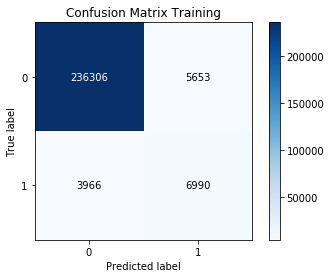

In [103]:
skplt.metrics.plot_confusion_matrix(true_label_train,pred_train, 
                                    normalize=False,
                                    title="Confusion Matrix Training")
plt.savefig('Conf_matrix_IF_werte_train.png')

In [104]:
acc = accuracy_score(true_label_train,pred_train)
pre = precision_score(true_label_train,pred_train)
f1 = f1_score(true_label_train,pred_train)
recall = recall_score(true_label_train,pred_train)
auc = roc_auc_score(true_label_train,train_scores)
display(acc,pre,f1,recall,auc)
classification_report(true_label_train,pred_train,output_dict=True)

0.9619674594231263

0.5528751087558332

0.5923979829653798

0.6380065717415115

0.9791102759722305

{'0': {'precision': 0.9834937071319172,
  'recall': 0.9766365375952124,
  'f1-score': 0.9800531280651804,
  'support': 241959},
 '1': {'precision': 0.5528751087558332,
  'recall': 0.6380065717415115,
  'f1-score': 0.5923979829653798,
  'support': 10956},
 'accuracy': 0.9619674594231263,
 'macro avg': {'precision': 0.7681844079438752,
  'recall': 0.807321554668362,
  'f1-score': 0.7862255555152802,
  'support': 252915},
 'weighted avg': {'precision': 0.9648397824386076,
  'recall': 0.9619674594231263,
  'f1-score': 0.9632603329770544,
  'support': 252915}}

In [ ]:
#--------------------- Testing --------------------------------

In [105]:
pred = model_optimiert.predict(test)
scores = model_optimiert.decision_function(test)
#plt.plot(pred)

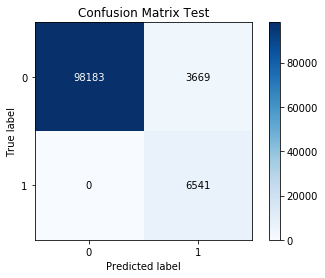

In [106]:
skplt.metrics.plot_confusion_matrix(true_label_test,pred, 
                                    normalize=False,
                                    title="Confusion Matrix Test")
plt.savefig('Conf_matrix_IF_werte_test.png')

In [107]:
acc_test = accuracy_score(true_label_test,pred)
pre_test = precision_score(true_label_test,pred)
f1_test = f1_score(true_label_test,pred)
recall_test = recall_score(true_label_test,pred)
auc_test = roc_auc_score(true_label_test,scores)
display(acc_test,pre_test,f1_test,recall_test,auc_test)
classification_report(true_label_test,pred,output_dict=True)

0.966150950707149

0.6406464250734574

0.7809683003999761

1.0

0.9657384844362576

{'0': {'precision': 1.0,
  'recall': 0.9639771433059734,
  'f1-score': 0.9816582098132827,
  'support': 101852},
 '1': {'precision': 0.6406464250734574,
  'recall': 1.0,
  'f1-score': 0.7809683003999761,
  'support': 6541},
 'accuracy': 0.966150950707149,
 'macro avg': {'precision': 0.8203232125367287,
  'recall': 0.9819885716529867,
  'f1-score': 0.8813132551066294,
  'support': 108393},
 'weighted avg': {'precision': 0.9783147275783998,
  'recall': 0.966150950707149,
  'f1-score': 0.9695475320253034,
  'support': 108393}}

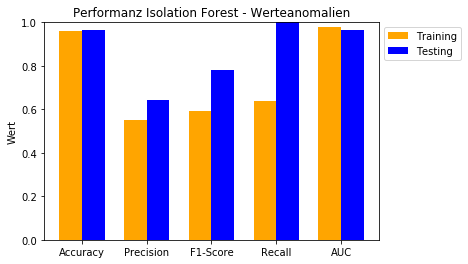

In [109]:
train_performanz = [acc,pre,f1,recall,auc]
test_performanz = [acc_test,pre_test,f1_test,recall_test,auc_test]
labels = ('Accuracy', 'Precision', 'F1-Score', 'Recall', 'AUC')

x = np.arange(len(labels)) 
width = 0.35  

plt.bar(x - width/2, train_performanz, width, label='Training',color='orange')
plt.bar(x + width/2, test_performanz, width, label='Testing',color='b')

plt.ylabel('Wert')
plt.title('Performanz Isolation Forest - Werteanomalien')
plt.xticks(x, labels)
plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(0,1)

#plt.show()
plt.savefig('Performance_IForest_Values.pdf',format='pdf', bbox_inches="tight")